In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In C:\Users\KulkarniPa\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KulkarniPa\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KulkarniPa\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\KulkarniPa\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KulkarniPa\Anaconda3\lib\site-packages\matplotlib\mpl-data\s

In [3]:
df= pd.read_csv(r'C:\Users\KulkarniPa\Downloads\INeuron\PawanDataPractice\Logistic Regression\advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Text(0.5, 0, 'Age')

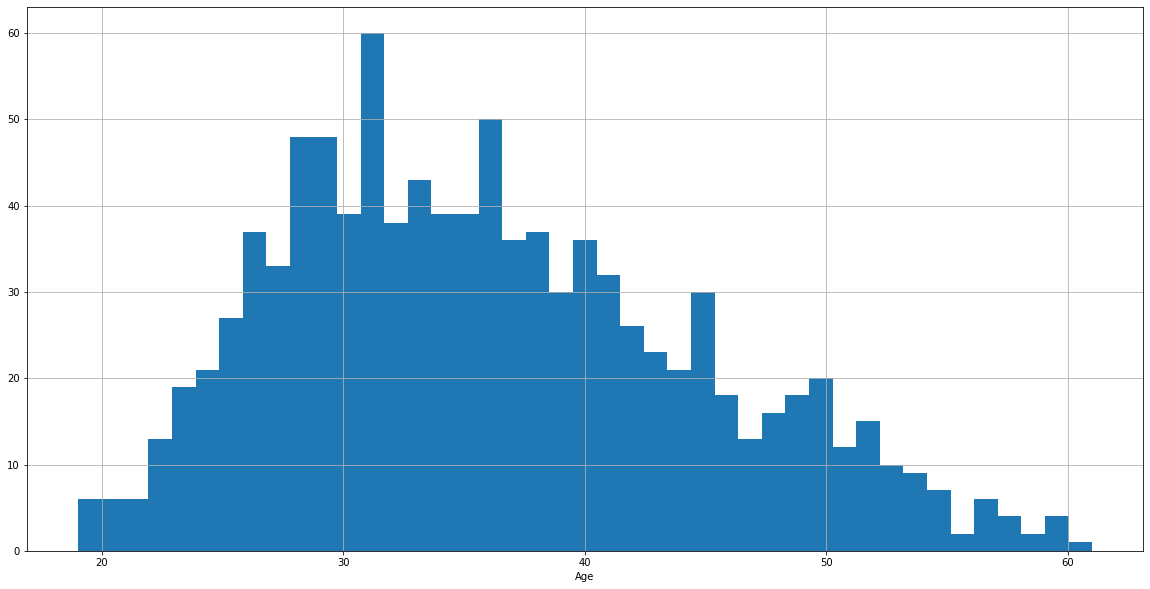

In [6]:
plt.figure(figsize=(20,10))
df.Age.hist(bins=df.Age.nunique())
plt.xlabel('Age')

<AxesSubplot:xlabel='Area Income'>

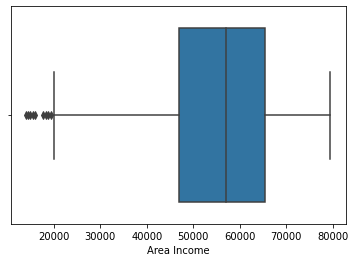

In [8]:
sns.boxplot(df['Area Income'])

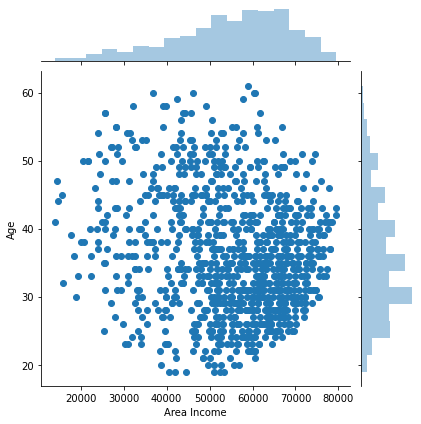

In [9]:
sns.jointplot(df['Area Income'],df.Age)

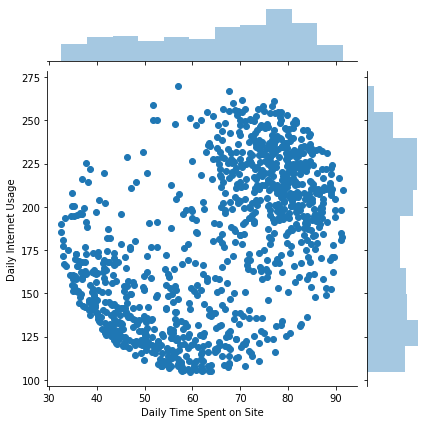

In [10]:
sns.jointplot(df['Daily Time Spent on Site'], df['Daily Internet Usage'])

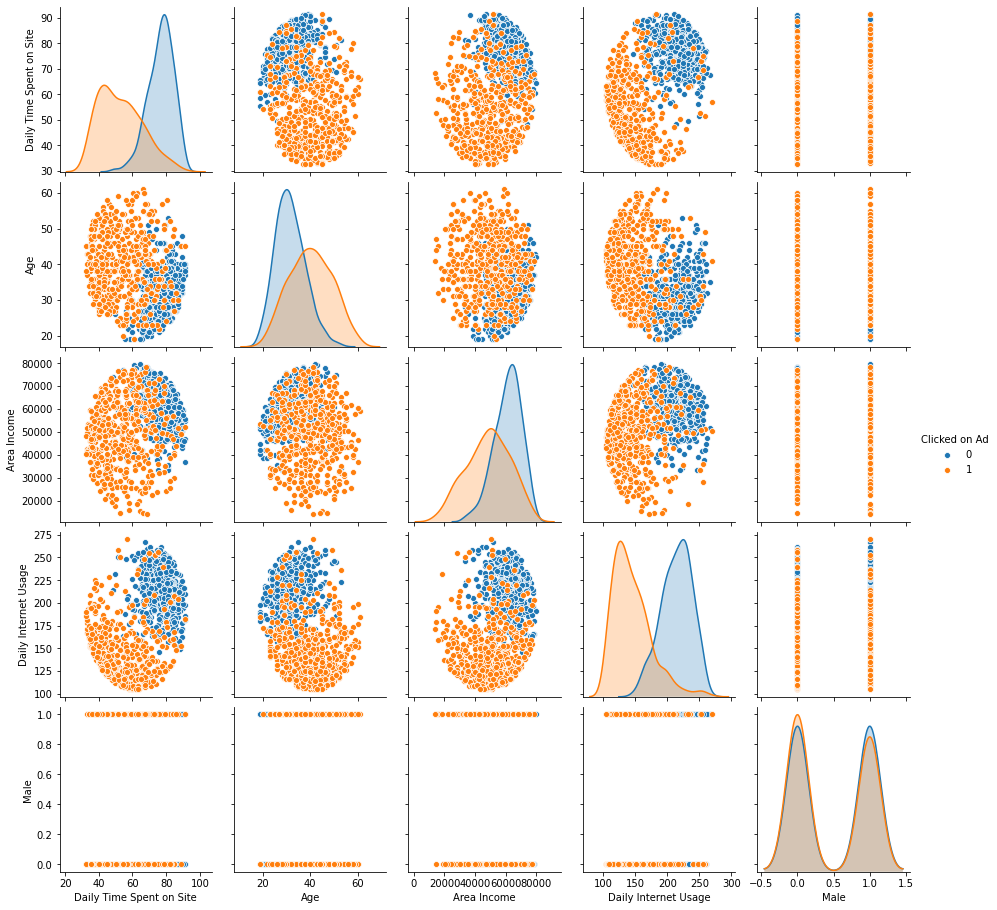

In [11]:
sns.pairplot(df, hue='Clicked on Ad')

<AxesSubplot:>

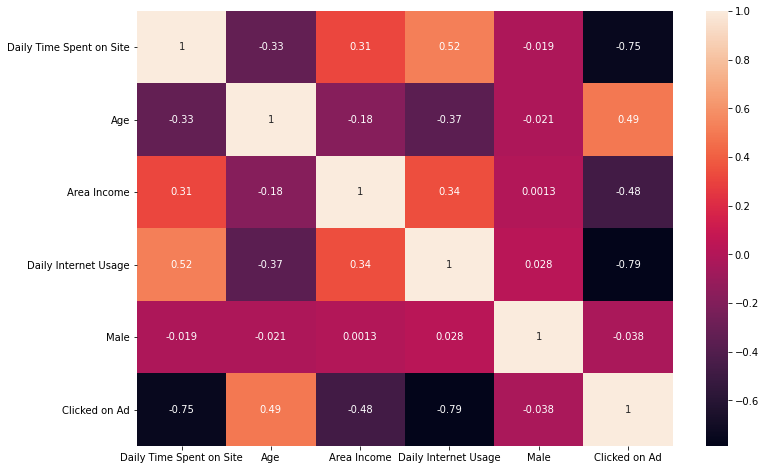

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
X = df.drop(['Timestamp','Clicked on Ad', 'Ad Topic Line','Country','City'],axis=1)
y=df['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
num_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']
ct = make_column_transformer(
    (MinMaxScaler(), num_columns),
    (StandardScaler(), num_columns),
    remainder='passthrough'
)
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [33]:
X_train

array([[ 0.73176951,  0.47619048,  0.76387767, ...,  0.6842786 ,
         1.52106049,  1.04381619],
       [ 0.22845487,  0.30952381,  0.78645239, ...,  0.79385516,
        -0.75764596, -0.95802308],
       [ 0.62587115,  0.14285714,  0.7908996 , ...,  0.81544168,
         0.73429367, -0.95802308],
       ...,
       [ 0.99898011,  0.61904762,  0.57909566, ..., -0.21264408,
         0.0339071 ,  1.04381619],
       [ 0.40897501,  0.54761905,  0.89615916, ...,  1.32636636,
        -0.95137476, -0.95802308],
       [ 0.97416284,  0.5       ,  0.69626269, ...,  0.35607887,
         0.29783409, -0.95802308]])

In [32]:
X_test

array([[ 5.21162672e-01,  2.38095238e-01,  6.22872635e-01, ...,
        -1.52805508e-04, -1.38350393e+00,  1.04381619e+00],
       [ 6.56637770e-01,  7.85714286e-01,  4.20300725e-01, ...,
        -9.83426752e-01, -1.33495777e+00, -9.58023079e-01],
       [ 1.87489376e-01,  4.52380952e-01,  7.29300043e-01, ...,
         5.16440523e-01, -1.04641583e+00,  1.04381619e+00],
       ...,
       [ 4.74757777e-01,  2.38095238e-01,  6.52986564e-01, ...,
         1.46018703e-01, -1.31923155e+00, -9.58023079e-01],
       [ 5.67737549e-01,  6.90476190e-01,  1.61812568e-01, ...,
        -2.23811538e+00, -1.12595859e+00,  1.04381619e+00],
       [ 9.41356451e-01,  4.52380952e-01,  6.51125316e-01, ...,
         1.36984295e-01,  9.33264534e-01,  1.04381619e+00]])

In [42]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [47]:
lr_clf.score

<bound method ClassifierMixin.score of LogisticRegression(solver='liblinear')>

Text(0.5, 1.0, 'PR Curve: precisions/recalls tradeoff')

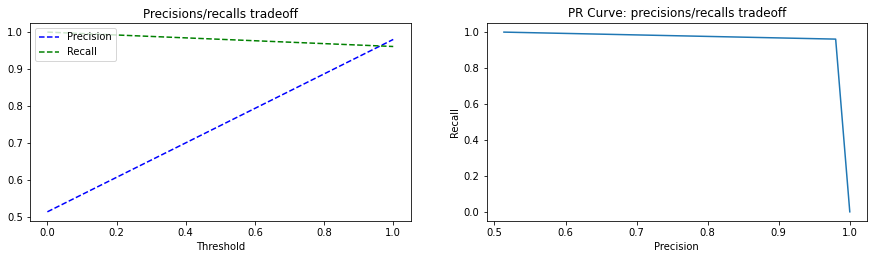

In [48]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precisions/recalls tradeoff")

precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test))

plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.subplot(2, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff")

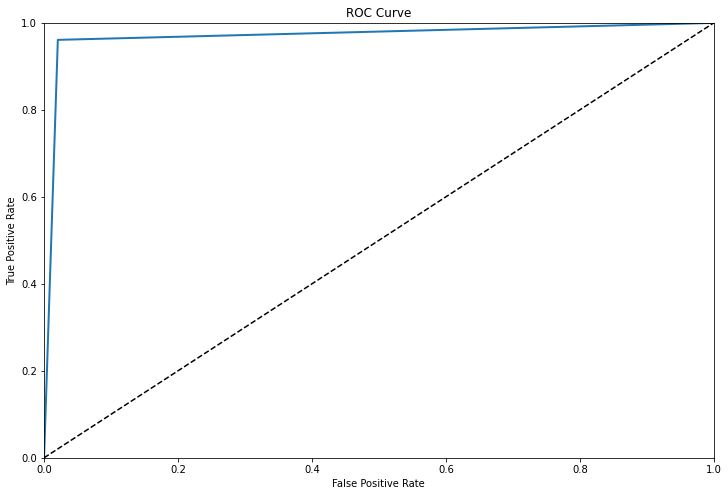

In [50]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test))
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show()

In [51]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, lr_clf.predict(X_test))

0.9702455079167409

In [53]:
#Hyperparametre tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV

lr_clf = LogisticRegression()

penalty = ['l1', 'l2']
C = [0.5, 0.6, 0.7, 0.8]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty, C=C, class_weight=class_weight, solver=solver)

lr_cv = GridSearchCV(estimator=lr_clf, param_grid=param_grid, scoring='accuracy',
                    verbose=1, n_jobs=-1, cv=10)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")

lr_clf = LogisticRegression(**best_params)
lr_clf.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best parameters: {'C': 0.6, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2', 'solver': 'saga'}


LogisticRegression(C=0.6, class_weight={0: 0.5, 1: 0.5}, solver='saga')